<a href="https://colab.research.google.com/github/Albina1810/ML-projects/blob/master/AJ_heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Models to Predict Heart Disease


Albina Joldassova




![alt text](https://guardian.ng/wp-content/uploads/2016/08/Heart-diseases.jpg)

Build classification machine learning models in Python using Heart Disease dataset (https://archive.ics.uci.edu/ml/datasets/Heart+Disease) or any other dataset of your choice.

1.Develop ML models in Python, using Jupyter Notebook or any other tool of your choice. Apply LogisticRegression, SVM, RandomForest classification algorithms. Apply Data Science Process Model as a guide.(80 points)

2.Apply GridSearchCV to find the best hyperparameters for your models. (30 points)

3.Assess model performance (confusion matrix, precision, recall, ROC AUC) and interpret performance from business impact viewpoint (false negatives vs false positives). (20 points)

4.Apply AutoML (Auto sklearn) to build classification model and compare model performance. (20 points)

# 1. Business **Understanding** 
Results of predictions are used by doctors to prescribe treatment plan for the patience with risk of heart disease.
By initial diagnostic measurement of the patient, a doctor can define whether the patient is at risk of having heart disease a doctor can prescribe preventive treatment that would be beneficial for the patient.  A Doctor can refer the patient at risk for the further examination.

We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. 

# **2. Data Understanding**

 **The objective** of the dataset is to diagnostically predict whether or not a patient has  heart disease
 
 ** Dataset source:**   https://archive.ics.uci.edu/ml/datasets/Heart+Disease. Heart Disease Data Set from 4 data base. 
 

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to  this date. The "target" field is boolean, refers to the presence of heart disease in the patient (value 1) or  absence (value 0). 

Attribute Information:

* **age:** The person's age in years

* **sex:** The person's sex (1 = male, 0 = female)

* **cp:**  The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

* **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)

* **chol:**  The person's cholesterol measurement in mg/dl

* **fbs:**  The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

* **restecg:**  Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

* **thalach:**  The person's maximum heart rate achieved

* **exang:**  Exercise induced angina (1 = yes; 0 = no)

* **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
 
* **slope:**  the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

* **ca:** The number of major vessels (0-3)

* **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

* **target: **Heart disease (0 = no, 1 = yes)



### Data Ingest


In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import files
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,

In [0]:
## read data
data = pd.read_csv("heart.csv")
data.sample(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1


In [0]:
## data size: 303 rows, and 14 columns
data.shape

(303, 14)

In [0]:
##  Data has no missing values
data.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64




### Explaratory Data Analysis

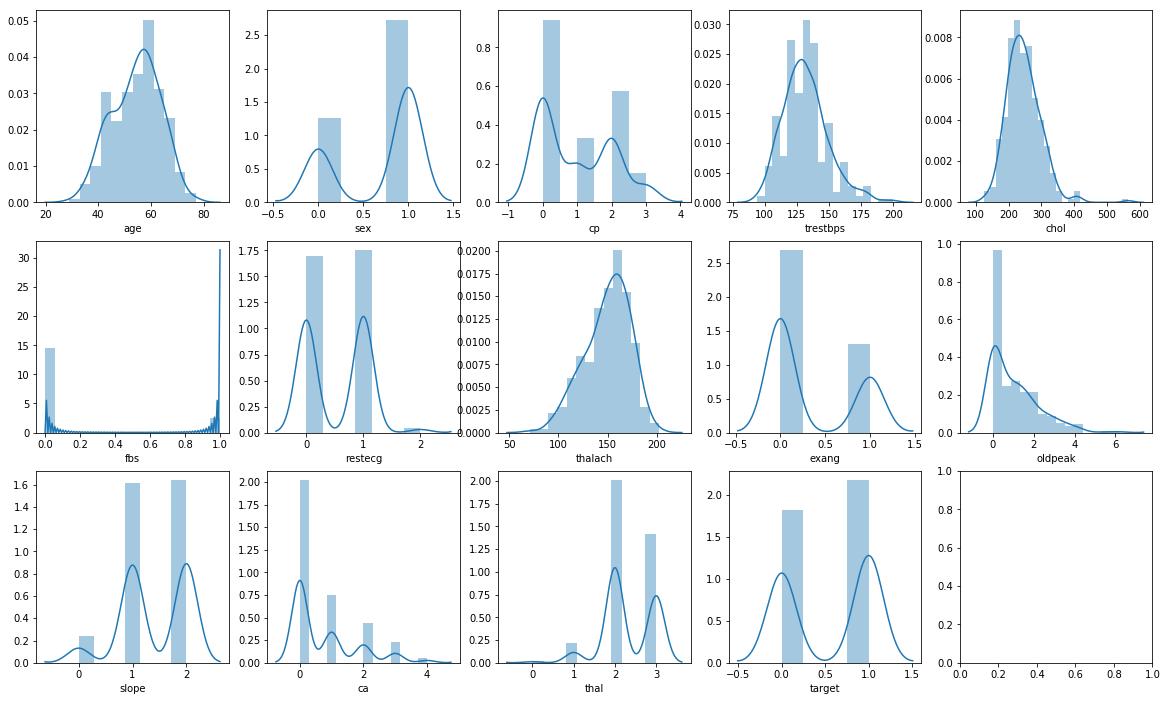

In [0]:
## see the distribution of data
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(3,5, figsize=(20, 12))
sns.distplot( data["age"], ax=axes[0,0])
sns.distplot( data["sex"], ax=axes[0,1])
sns.distplot( data["cp"], ax=axes[0,2])
sns.distplot( data["trestbps"], ax=axes[0,3])
sns.distplot( data["chol"], ax=axes[0,4])
sns.distplot( data["fbs"], ax=axes[1,0])
sns.distplot( data["restecg"], ax=axes[1,1])
sns.distplot( data["thalach"], ax=axes[1,2])
sns.distplot( data["exang"], ax=axes[1,3])
sns.distplot( data["oldpeak"], ax=axes[1,4])
sns.distplot( data["slope"], ax=axes[2,0])
sns.distplot( data["ca"], ax=axes[2,1])
sns.distplot( data["thal"], ax=axes[2,2])
sns.distplot( data["target"], ax=axes[2,3])

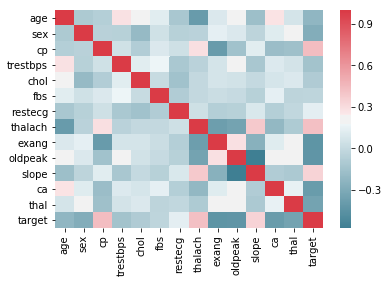

In [0]:
##Correlation Heatmap: Exercise induced angina and OldPeak is significant and negatively corelated
corr =data.corr()
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, cmap = cmap,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# 3.Data Preparation

It's a clean, easy to understand set of data. No missing values,  no need of  data cleaning
To prepare data for ML, we have to define independent and dependent variables, and also split the dataset into train and test sets

In [0]:
## define independent(features) and dependent(target) variables
features = data.drop(['target'],axis=1)
target = data.target

## Split dataset into tarin (80%) and test (20%) sets
import sklearn
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(features,target,random_state=30,test_size=0.2)


In [0]:
model_Log = LogisticRegression(random_state=34)
model_Log.fit(train_x,train_y)
print("Accuracy using LogisticRegression ",accuracy_score(test_y,model_Log.predict(test_x)))

# 4. Modeling 

In [0]:
## import ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, accuracy_score


###Logistic Regression Classifier

In [0]:
model_Log = LogisticRegression(random_state=34)
model_Log.fit(train_x,train_y)
print("Accuracy using Logistic Regression ",model_Log.score(test_x, test_y))

## the accuracy of the model  is 0.8360

Accuracy using Logistic Regression  0.8360655737704918


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### SVM Calssifier

In [0]:
model_SVM = svm.SVC(C=0.8, kernel='linear', decision_function_shape='ovr')
model_SVM.fit(train_x, train_y)
print("Accuracy using SVM ",model_SVM.score(test_x, test_y))


## the accuracy of the model  is 0.8360

Accuracy using SVM  0.8360655737704918


### Random Forest Classifier

In [0]:
model_RF = RandomForestClassifier(random_state=45)
model_RF.fit(train_x,train_y)
print("Accuracy using Random Forest",model_RF.score(test_x, test_y))

#Accuracy using RandomForestClassifier  0.7213

Accuracy using Random Forest 0.7213114754098361


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# GridSearchCV

In [0]:
# SVM GridSearch: we have to specify the type of Kernel for SVM. 
## It turns out that the best kernel parameter is "linear" whcih we used for SVM Classifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
parameters = {'kernel':('linear', 'rbf'), 'C':[0.8,0.9,1]}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters, scoring='f1_macro', cv=5)
result = clf.fit(train_x, train_y)

In [0]:
# Result of SVM GridSearch
result_svc = pd.DataFrame(result.cv_results_)
result_svc.sort_values(by='mean_test_score', ascending=False).head(5)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.166665,0.022755,0.002154,0.000101,0.8,linear,"{'C': 0.8, 'kernel': 'linear'}",0.856184,0.854968,0.816020,...,0.836945,0.044203,1,0.857518,0.852026,0.847763,0.858076,0.890651,0.861207,0.015201
2,0.192682,0.035238,0.002122,0.000032,0.9,linear,"{'C': 0.9, 'kernel': 'linear'}",0.856184,0.854968,0.816020,...,0.836945,0.044203,1,0.857518,0.852026,0.847763,0.858076,0.885588,0.860194,0.013249
4,0.206359,0.037016,0.002188,0.000066,1,linear,"{'C': 1, 'kernel': 'linear'}",0.856184,0.811297,0.816020,...,0.828102,0.044081,3,0.852446,0.852446,0.847763,0.858076,0.885588,0.859264,0.013562
1,0.005403,0.000212,0.002785,0.001368,0.8,rbf,"{'C': 0.8, 'kernel': 'rbf'}",0.346667,0.346667,0.346667,...,0.345941,0.001742,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.005493,0.000093,0.002238,0.000136,0.9,rbf,"{'C': 0.9, 'kernel': 'rbf'}",0.346667,0.346667,0.346667,...,0.345941,0.001742,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


# 5. Models Performance Evaluation

### Logistic Regression Classifier Evaluation

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


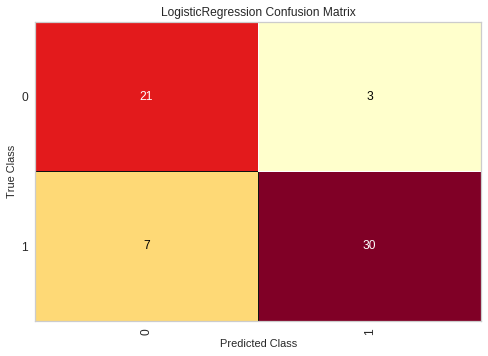

0.8360655737704918

In [0]:
## CONFUSION MATRIX
from yellowbrick.classifier import ConfusionMatrix

##Logistic Regression Classifier Confusion Matrix: the number of false positives is lower than false negatives, 
##the model fails to recognize heart disease in sick more often than it fails to classify a person with no disease as sick.
cm = ConfusionMatrix(model_Log, classes=[0,1])
cm.fit(train_x, train_y)
cm.score(test_x, test_y)
cm.poof()
cm.score(test_x,test_y)


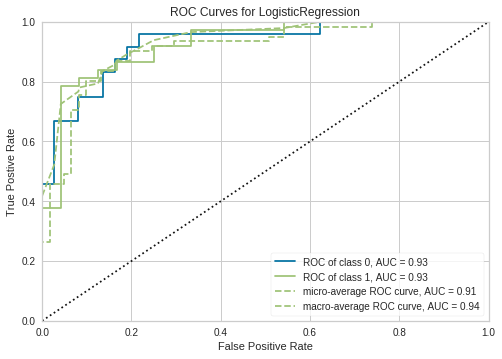

In [0]:
#ROC AUC: area under the curve is 0.93 , False positive rate is small
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model_Log, classes=classes)
visualizer.score(test_x, test_y)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

### SVM Classifier Evaluation

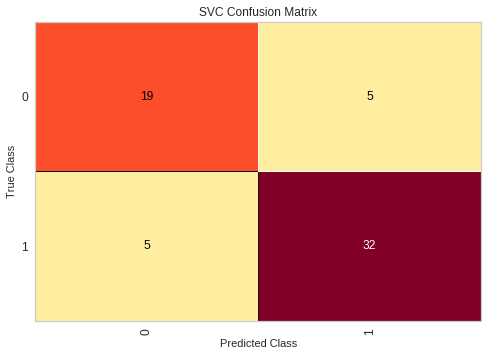

0.8360655737704918

In [0]:
##SVM Calssifier Confusion Matrix: the number of false positives and false negatives are the same
#the model fails to recognize heart disease in a sick persin and fails to classify a person with no disease as sick with the same frequency.
cm2 = ConfusionMatrix(model_SVM, classes=[0,1])
cm2.fit(train_x, train_y)
cm2.score(test_x, test_y)
cm2.poof()
cm2.score(test_x,test_y)

<Figure size 576x396 with 0 Axes>

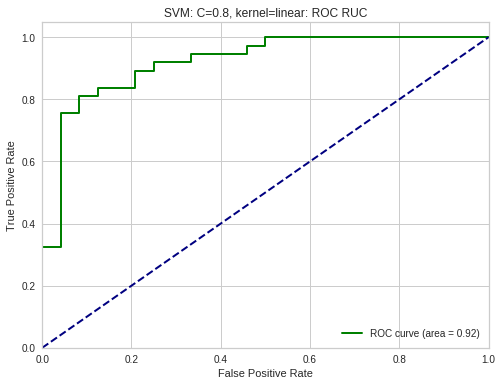

In [0]:
##ROC AUC : area under the curve is 0.92: False positive rate is small
from sklearn.metrics import roc_curve, auc
y_score = model_SVM.fit(train_x, train_y).decision_function(test_x)
fpr,tpr,threshold = roc_curve(test_y, y_score)
roc_auc = auc(fpr,tpr)  
plt.figure()
lw = 2
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='green',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM: C=0.8, kernel=linear: ROC RUC')
plt.legend(loc="lower right")
plt.show()

### Random Forest Classifier Evaluation

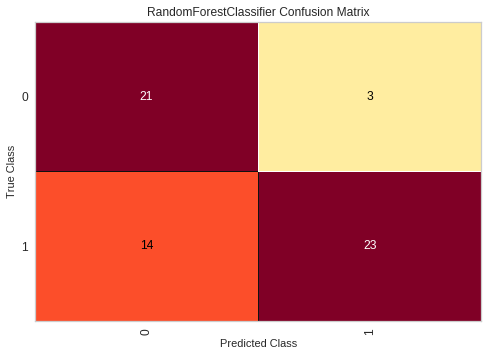

0.7213114754098361

In [0]:
##Random Forest Calssifier Confusion Matrix: the number of false positives is much lower than false negatives, 
##the model fails to recognize heart disease in sick much more often than it fails to classify a person with no disease as sick.
cm3 = ConfusionMatrix(model_RF, classes=[0,1])
cm3.fit(train_x, train_y)
cm3.score(test_x, test_y)
cm3.poof()
cm3.score(test_x,test_y)

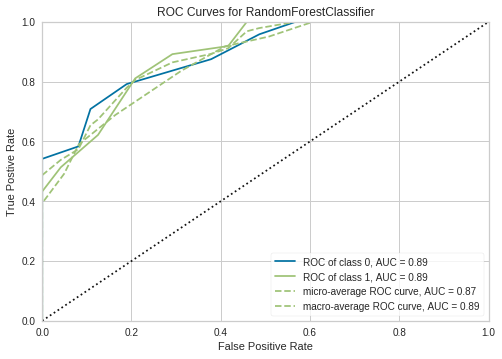

In [0]:
## ROC AUC: area under the curve is 0.89: False positive rate is small

visualizer = ROCAUC(model_RF, classes=classes)
visualizer.score(test_x, test_y)  # Evaluate the model on the test data
g = visualizer.poof() 

# **AUTO ML**

In [0]:
!pip -q install requests
!pip -q install tabulate
!pip -q install "colorama>=0.3.8"
!pip -q install future
!pip -q install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

     |████████████████████████████████| 121.8MB 9.1MB/s 


In [0]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.2" 2019-01-15; OpenJDK Runtime Environment (build 11.0.2+9-Ubuntu-3ubuntu118.04.3); OpenJDK 64-Bit Server VM (build 11.0.2+9-Ubuntu-3ubuntu118.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpga4uxv36
  JVM stdout: /tmp/tmpga4uxv36/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpga4uxv36/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.3
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_unknownUser_xk3g6q
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [0]:
train = h2o.import_file("heart.csv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
x = train.columns
y = "target"
x.remove(y)


In [0]:
## IMPORTANT, otherwise it will treat it like regression
train[y] = train[y].asfactor()

In [0]:
aml = H2OAutoML(max_runtime_secs=300)
aml.train(x = x, y = y, training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [0]:
lb=aml.leaderboard
lb

##the best model is model_20 GBM_grid_1

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_20190508_080519_model_20,0.909179,0.392618,0.183729,0.351706,0.123697
GBM_grid_1_AutoML_20190508_080519_model_17,0.908432,0.402569,0.174704,0.354263,0.125502
GBM_grid_1_AutoML_20190508_080519_model_14,0.905621,0.387297,0.181291,0.350595,0.122917
XGBoost_1_AutoML_20190508_080519,0.903909,0.391569,0.170487,0.352846,0.1245
XGBoost_grid_1_AutoML_20190508_080519_model_2,0.903008,0.408858,0.189065,0.35638,0.127007
XGBoost_grid_1_AutoML_20190508_080519_model_6,0.902899,0.399127,0.181884,0.354381,0.125586
GBM_grid_1_AutoML_20190508_080519_model_6,0.902811,0.55774,0.170487,0.429092,0.18412
XGBoost_2_AutoML_20190508_080519,0.901888,0.42205,0.189723,0.362214,0.131199
XGBoost_3_AutoML_20190508_080519,0.900878,0.395793,0.188538,0.354459,0.125641
StackedEnsemble_AllModels_AutoML_20190508_080519,0.900264,0.404838,0.177668,0.35587,0.126643


In [0]:
train, test = train.split_frame(ratios=[0.7], seed=1234)
preds = aml.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [0]:
preds

predict,p0,p1
1,0.490411,0.509589
1,0.276273,0.723727
1,0.398672,0.601328
1,0.303321,0.696679
1,0.257388,0.742612
1,0.0710161,0.928984
0,0.60951,0.39049
1,0.104063,0.895937
1,0.0733053,0.926695
1,0.0746871,0.925313


#6. CONCLUSION AND DEPLOYMENT

Among  ML models, **Logistic Regression Classifier** gives  the highest **83% accuracy score**, which means that the model was correct in 83% of predictions.

**A confusion matrix** is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Logistic Regression Classifier's Confusion Matrix shows that the number of false positives is lower than false negatives, which means
the model fails to recognize heart disease in sick more often than it fails to classify a person with no disease as sick. This is someting that doctors who use the model should be aware of, and if they feel that the model's prediction run counter their intuition, they should prescribe aditional examination, as the prediction model tends to make "optimistic" for the patient predictions.

**SVM GridSearch:** helps to specify the type of Kernel for SVM.  It turned out that the best kernel parameter for SVM is **"linear"** which we used in our  SVM Classifier.

**AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve**. It is one of the most important evaluation metrics for checking any classification model’s performance. The top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This means that a larger area under the curve (AUC) is usually better. All our models have high accuracy, the Logistic Regression has the largest area under the curve(AUC), which is 93%

**AUTO ML** gives the best results. The accurcy of the AUTO ML model is almost 91%, it was done by using **Gradient Boosting Machine** model. The time spent on AutoML training was set as 5 min, which is very effective and the most convenient way to train the model given its  high accuracy.



